In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, '../')

from pharynx_analysis import experiment
from pharynx_analysis import pharynx_io
from pharynx_analysis import image_processing
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from skimage import measure, transform
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
import pickle

In [4]:
pe = pickle.load(open('/Users/sean/code/wormAnalysis/data/experiment.pickle', 'rb'))

In [5]:
pe.raw_intensity_data

<xarray.DataArray (wavelength: 4, strain: 123, z: 500)>
array([[[259.818007, 260.555123, ..., 569.214173, 574.518507],
        [259.305746, 259.755844, ..., 435.001095, 399.094012],
        ...,
        [256.756306, 257.153912, ..., 530.517943, 530.265075],
        [250.762366, 251.438811, ..., 555.915619, 555.088395]],

       [[232.377641, 232.809149, ..., 520.366832, 527.263368],
        [239.417625, 240.24482 , ..., 405.693932, 388.964681],
        ...,
        [237.307997, 236.973307, ..., 471.272083, 475.339085],
        [233.327148, 233.513203, ..., 499.718167, 499.9858  ]],

       [[260.283194, 260.514317, ..., 599.468459, 605.698271],
        [263.554874, 263.916593, ..., 445.445807, 421.631645],
        ...,
        [259.402943, 260.59293 , ..., 517.6299  , 521.189701],
        [248.5705  , 248.538128, ..., 560.186507, 557.418881]],

       [[238.273331, 238.949942, ..., 515.077484, 520.109492],
        [234.454276, 235.203257, ..., 395.639036, 375.436833],
        ...,
    

In [6]:
pe.raw_intensity_data.sel(wavelength='410_1').groupby('strain', restore_coord_dims=False).mean(dim='strain').strain.data

array(['HD233', 'SAY47'], dtype=object)

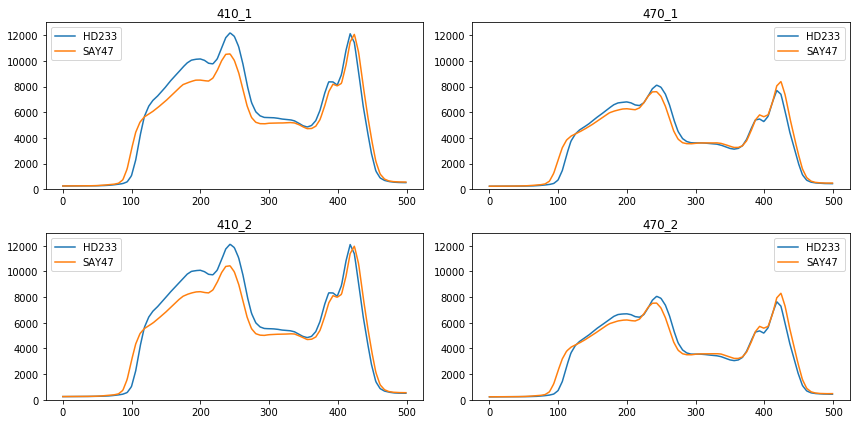

In [7]:
fig = plt.figure(figsize=(12,6))

for i, wvl in enumerate(pe.raw_intensity_data.wavelength.data):
    ax = plt.subplot(2, 2, i+1)
    xs = np.linspace(1,100,500)
    data = pe.raw_intensity_data.sel(wavelength=wvl).groupby('strain', restore_coord_dims=False).mean(dim='strain').T
    ax.plot(data)
    ax.legend(data.strain.data)
    ax.set_ylim((0, 1.3e4))
    ax.set_title(wvl)
    
    
plt.tight_layout()

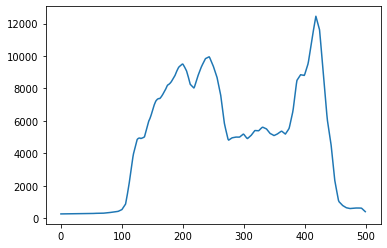

In [8]:
d = pe.raw_intensity_data.sel(wavelength='410_1',strain='HD233')[1]
_=plt.plot(d)

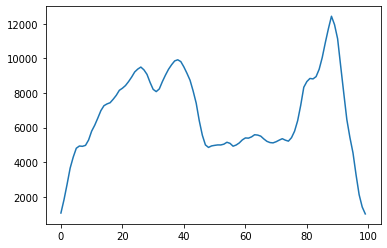

In [9]:
plt.plot(image_processing.trim_profile(d.data, 1000, 100));

In [10]:
pe.raw_intensity_data.shape

(4, 123, 500)

In [11]:
starts = np.argmax(pe.raw_intensity_data.sel(wavelength="410_1").T>2000, axis=0)

/Users/sean/.local/share/virtualenvs/python-zUhjj0fC/lib/python3.7/site-packages/xarray/core/dataarray.py:1597: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  return self.transpose()


In [12]:
ends = pe.raw_intensity_data.shape[2] - np.argmax(np.fliplr(pe.raw_intensity_data.sel(wavelength="410_1")).T>2000, axis=0)

In [13]:
starts

<xarray.DataArray (strain: 123)>
array([106, 112, 111, 111, 103, 108, 104, 113, 106, 109, 109, 108,  97, 110,
       103, 109, 101, 104, 104, 102, 103, 118, 106, 104, 111,  99, 111, 102,
       117, 110, 109, 109, 104, 113, 110, 113, 104, 110, 101, 105, 103, 100,
       106, 105, 109,  97, 102, 107, 104, 104, 108, 110,  95,  98, 106, 109,
       110, 109, 100,  97,  98,  96, 102,  95,  95,  98,  95, 112,  93,  98,
        98, 106,  95,  97,  92, 103,  96,  91,  95,  83,  93, 105,  99,  94,
        96,  98,  99,  96,  94,  99,  90,  98,  92, 104, 101,  98,  88, 100,
       100,  95,  97,  98,  99,  97,  94, 108, 105, 105,  93,  90,  92,  98,
        90,  90,  98,  94,  93, 108, 106,  92,  89,  95, 103])
Coordinates:
  * strain      (strain) <U5 'HD233' 'HD233' 'HD233' ... 'SAY47' 'SAY47' 'SAY47'
    wavelength  <U5 '410_1'

In [14]:
np.linspace(starts, ends, 100, axis=1)

array([[106.        , 109.48484848, 112.96969697, ..., 444.03030303,
        447.51515152, 451.        ],
       [112.        , 115.42424242, 118.84848485, ..., 444.15151515,
        447.57575758, 451.        ],
       [111.        , 114.46464646, 117.92929293, ..., 447.07070707,
        450.53535354, 454.        ],
       ...,
       [ 89.        ,  92.68686869,  96.37373737, ..., 446.62626263,
        450.31313131, 454.        ],
       [ 95.        ,  98.61616162, 102.23232323, ..., 445.76767677,
        449.38383838, 453.        ],
       [103.        , 106.58585859, 110.17171717, ..., 450.82828283,
        454.41414141, 458.        ]])

In [15]:
starts = np.argmax(pe.raw_intensity_data.T>2000, axis=0).data
ends = np.argmax(np.fliplr(pe.raw_intensity_data).T>2000, axis=0)

In [16]:
pe.rot_fl.sel(wavelength='410_1').data.T.shape

(174, 130, 123)

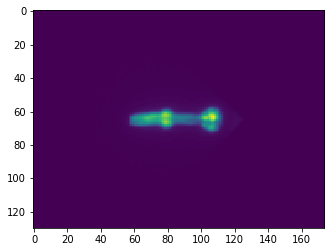

In [17]:
plt.imshow(pe.rot_fl.sel(wavelength='410_1').data[0])

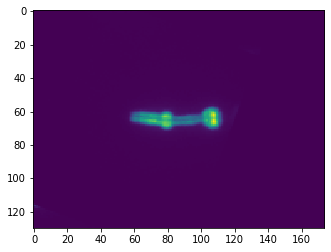

In [18]:
plt.imshow(pe.rot_fl.sel(wavelength='410_1').data[1])

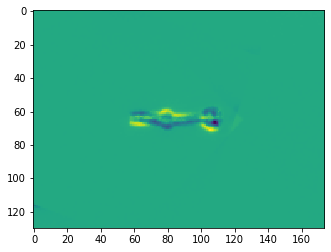

In [19]:
plt.imshow(pe.rot_fl.sel(wavelength='410_1').data[0] - pe.rot_fl.sel(wavelength='410_1').data[1])

In [31]:
for wvl in pe.raw_intensity_data.wavelength.data:
    print(wvl)

410_1
470_1
410_2
470_2
